This notebook shows that if we make the Old Bird detector filter length proportional to the sample rate,
the filter frequency response is very similar across a range of common sample rates.

# Preliminaries

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

import dsp_utils

%matplotlib inline

detector_name = 'Tseep'
sample_rates = [22050, 24000, 32000, 44100, 48000]
filter_length_fixed = False

# Design filters.

In [82]:
bw = 100

if detector_name == 'Thrush':
    f0 = 2800
    f1 = 5000
else:
    f0 = 6000
    f1 = 10000

def get_filter_length(fs):
    if filter_length_fixed:
        return 100
    else:
        return int(round(100 * (fs / 22050)))
    
hs = {}
filter_lengths = {}
for fs in sample_rates:
    filter_lengths[fs] = get_filter_length(fs)
    fs2 = fs / 2
    bands = np.array([0, f0 - bw, f0, f1, f1 + bw, fs2]) / fs2
    desired = np.array([0, 0, 1, 1, 0, 0])
    hs[fs] = dsp_utils.firls(filter_lengths[fs], bands, desired)

# Plot frequency responses.

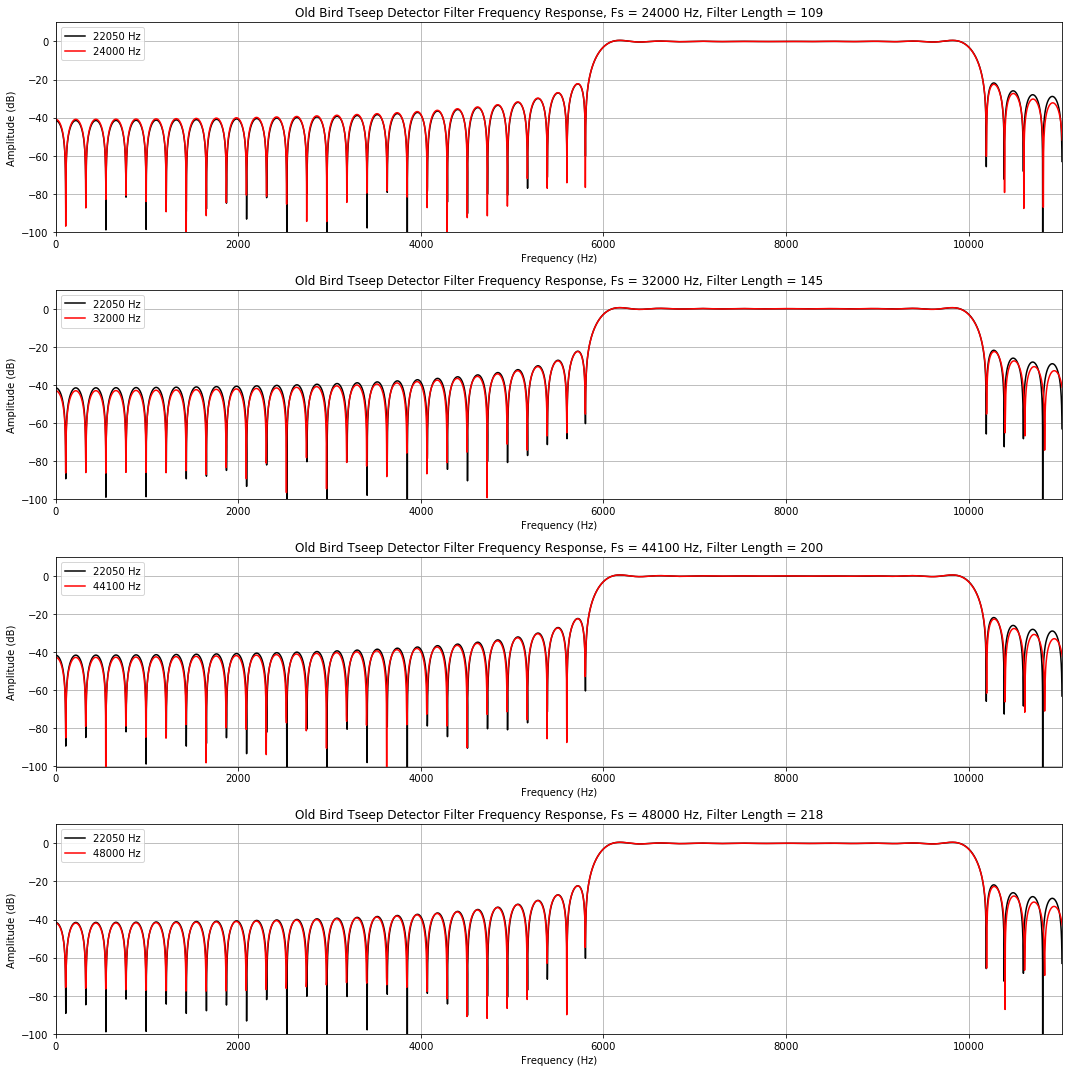

In [83]:
# Get frequency responses.
Hs = {}
freqs = {}
for fs in sample_rates:
    w, Hs[fs] = signal.freqz(hs[fs], worN=8192)
    freqs[fs] = w * fs / (2 * np.pi)


# Plot frequency responses.

ys_22050 = 20 * np.log10(abs(Hs[22050]))

num_subplots = len(sample_rates) - 1
subplot_num = 1

figure = plt.figure(figsize=(15, 15))

for fs in sample_rates[1:]:
    plt.subplot(num_subplots, 1, subplot_num)
    plt.plot(freqs[22050], ys_22050, 'k', label='22050 Hz')
    plt.plot(freqs[fs], 20 * np.log10(abs(Hs[fs])), 'r', label='{} Hz'.format(fs))
    plt.title('Old Bird {} Detector Filter Frequency Response, Fs = {} Hz, Filter Length = {}'.format(
        detector_name, fs, filter_lengths[fs]))
    plt.ylabel('Amplitude (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylim([-100, 10])
    plt.xlim([0, 11025])
    plt.grid()
    plt.legend()
    subplot_num += 1
    
plt.tight_layout()
plt.show()
figure.savefig('Old Bird {} Detector Filter Frequency Responses.pdf'.format(detector_name))